In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [9]:
# Cargamos la segunda sheet para obtener los datos
df_all = pd.read_excel('PROYECTO 2 - DATA SCIENCE.xlsx', sheet_name=1)

In [10]:
data, df = df_all,df_all
df_all

,YEAR,MONTH,DISTRICT,ID_STORE,ITEM GROUP,BRAND,ITEM,#TRX,# CLIENTS,PIECES,SALES
0,2022,1,San Fernando,2,371001,S/M,1628265,1,1,1,50.4
1,2022,1,Manzanillo,903,371001,S/M,1628265,1,1,1,50.4
2,2022,1,Jalisco Altos,102,371207,ACTECK,2033402,1,1,1,30.0
3,2022,1,Guanajuato Norte,56,371207,ACTECK,2033402,1,1,1,30.0
4,2022,1,Madero,1,371010,KINGSTON TECHNOLOGY,2081358,1,1,1,153.6
...,...,...,...,...,...,...,...,...,...,...,...
88006,2023,12,Guanajuato,900,440405,SONY,2863103,1,1,1,11586.0
88007,2023,12,Guanajuato,900,440406,SONY,2863104,1,1,1,21412.8
88008,2023,12,San Fernando,2,440408,LG,2863105,2,2,2,47583.6
88009,2023,12,Guanajuato,900,440402,TCL,2876077,1,1,1,4240.8


$\textbf{AÑO:}$ El año de la transacción.

$\textbf{MES:}$ El mes de la transacción.

$\textbf{DISTRITO:}$ El distrito donde se realizó la transacción.

$\textbf{ID_TIENDA:}$ El identificador de la tienda donde ocurrió la transacción.

$\textbf{GRUPO DE ARTÍCULOS:}$ La categoría del grupo de artículos vendidos.

$\textbf{MARCA:}$ La marca del artículo vendido.

$\textbf{ARTÍCULO:}$ El código específico del artículo.

$\textbf{/#TRX:}$ El número de transacciones.

$\textbf{/# CLIENTES:}$ El número de clientes involucrados en la transacción.

$\textbf{PIEZAS:}$ El número de piezas vendidas.

$\textbf{VENTAS:}$ El monto total de las ventas.


In [11]:
categorical_columns = df_all.select_dtypes(include=['object']).columns.tolist() 
numerical_columns = df_all.select_dtypes(include=['number']).columns.tolist()
# 'Grupo artículos' se toma como categórico

analysis_content = ""

print("Columnas Categóricas")
analysis_content += "### Columnas Categóricas\n"
for column in categorical_columns:
    unique_values_count = df_all[column].nunique()
    print(f"--{column}: Categorica con {unique_values_count} valores diferentes. Ejemplo: {df[column].dropna().unique()[:5].tolist()}.\n")
    
print("Columnas Numéricas")
analysis_content += "\n### Columnas Numéricas\n"
for column in numerical_columns:
    unique_values_count = df[column].nunique()
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"--{column}: El rango de valores en esta columna es de {min_value} a {max_value}.\n")

Columnas Categóricas
--DISTRICT: Categorica con 24 valores diferentes. Ejemplo: ['San Fernando', 'Manzanillo', 'Jalisco Altos', 'Guanajuato Norte', 'Madero'].

--BRAND: Categorica con 86 valores diferentes. Ejemplo: ['S/M', 'ACTECK', 'KINGSTON TECHNOLOGY', 'LA IMPERIAL', 'SANDISK'].

Columnas Numéricas
--YEAR: El rango de valores en esta columna es de 2022 a 2023.

--MONTH: El rango de valores en esta columna es de 1 a 12.

--ID_STORE: El rango de valores en esta columna es de 1 a 3005.

--ITEM GROUP: El rango de valores en esta columna es de 370001 a 440501.

--ITEM: El rango de valores en esta columna es de 1628265 a 2876078.

--#TRX: El rango de valores en esta columna es de 1 a 41.

--# CLIENTS: El rango de valores en esta columna es de 1 a 41.

--PIECES: El rango de valores en esta columna es de -5 a 55.

--SALES: El rango de valores en esta columna es de -33826.799999999996 a 618978.0.



In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

corr_matrix = pd.DataFrame(np.zeros((len(numerical_columns) + len(categorical_columns), 
                                     len(numerical_columns) + len(categorical_columns))),
                           index=numerical_columns + categorical_columns,
                           columns=numerical_columns + categorical_columns)

# Calcular correlaciones entre columnas numéricas utilizando la correlación de Pearson
for col1 in numerical_columns:
    for col2 in numerical_columns:
        corr_matrix.loc[col1, col2] = data[col1].corr(data[col2])

# Codificar variables categóricas para correlación con variables numéricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

for cat_col in categorical_columns:
    for num_col in numerical_columns:
        corr_matrix.loc[cat_col, num_col] = stats.pointbiserialr(data[cat_col], data[num_col])[0]
        corr_matrix.loc[num_col, cat_col] = corr_matrix.loc[cat_col, num_col]

# Calcular correlaciones entre columnas categóricas
for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        corr_matrix.loc[cat_col1, cat_col2] = cramers_v(data[cat_col1], data[cat_col2])

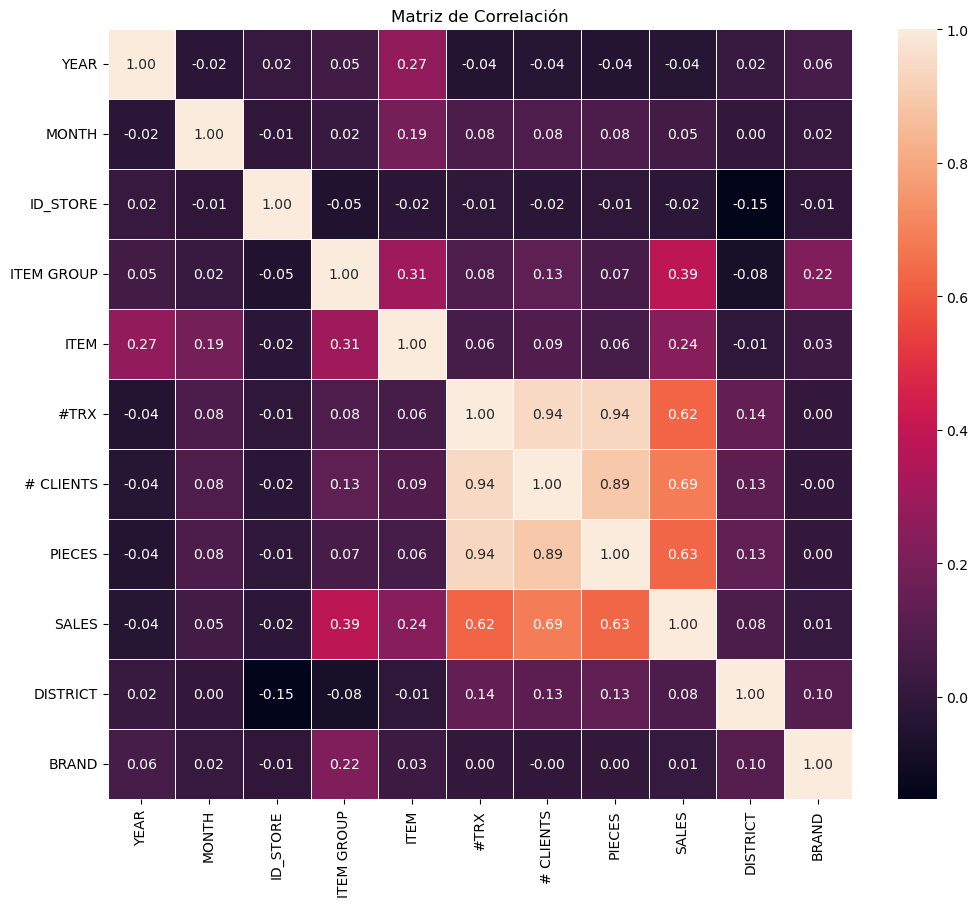

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Genera clasificaciones de productos por comportamientos de venta

In [14]:
# Se agrupa por item y se suman las ventas
item_sales=df_all.groupby('ITEM').agg({
   'SALES':'sum',
    'PIECES':'sum',
    '#TRX':'sum',
   '# CLIENTS':'sum'}).reset_index()

# Tomamos cuartiles para obtener una clasificacion
sales_thresholds = item_sales['SALES'].quantile([0.25, 0.5, 0.75])

def classify_sales(sales):
    if sales >= sales_thresholds[0.75]:
        return 'AVV'
    elif sales >= sales_thresholds[0.5]:
        return 'MVV'
    elif sales >= sales_thresholds[0.25]:
        return 'BVV'
    else:
        return 'MBVV'
item_sales['Vtas Comp'] = item_sales['SALES'].apply(classify_sales)

In [15]:
print("Top 5 de productos con alta cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='AVV'][['ITEM','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))
print("\n Top 5 de productos con moderada cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='MVV'][['ITEM','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))
print("\n Top 5 de productos con baja cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='BVV'][['ITEM','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))
print("\n Top 5 de productos con muy baja cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='MBVV'][['ITEM','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))

Top 5 de productos con alta cantidad de ventas
   ITEM      SALES  PIECES  #TRX  # CLIENTS
2691337 19719352.8    2207  2193       2156
2773449 16970335.2    1507  1471       1383
2691342 16765276.8    1440  1468       1438
2708120 16347817.2     975  1020        965
2708117 15717601.2    1215  1229       1204

 Top 5 de productos con moderada cantidad de ventas
   ITEM    SALES  PIECES  #TRX  # CLIENTS
2768118 378183.6      24    24         24
2848191 378014.4      29    28         26
2821386 375573.6      25    24         24
2847663 370788.0      27    27         26
2723121 367743.6      11    13         13

 Top 5 de productos con baja cantidad de ventas
   ITEM   SALES  PIECES  #TRX  # CLIENTS
2732475 57927.6       3     3          3
2639835 57902.4      11    13         13
2690007 57397.2     182   185        173
2637787 57153.6      12    14         13
2628854 57097.2      21    21         21

 Top 5 de productos con muy baja cantidad de ventas
   ITEM  SALES  PIECES  #TRX  # CLIE

Así se clasifican los productos por ventas, no se pued decir mucho porque se tiene solo el numero del producto, se puede observar que entre más clientes, mas transacciones y más piezas, más ventas hay

# Genera clasificaciones de tienda por comportamientos de venta

In [16]:
# Se agrupa por tienda y se suman las ventas
item_sales=df_all.groupby('ID_STORE').agg({
   'SALES':'sum',
    'PIECES':'sum',
    '#TRX':'sum',
   '# CLIENTS':'sum'}).reset_index()

# Tomamos cuartiles para obtener una clasificacion
sales_thresholds = item_sales['SALES'].quantile([0.25, 0.5, 0.75])

def classify_sales(sales):
    if sales >= sales_thresholds[0.75]:
        return 'AVV'
    elif sales >= sales_thresholds[0.5]:
        return 'MVV'
    elif sales >= sales_thresholds[0.25]:
        return 'BVV'
    else:
        return 'MBVV'

In [17]:
item_sales['Vtas Comp'] = item_sales['SALES'].apply(classify_sales)

print("Top 5 de tiendas con alta cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='AVV'][['ID_STORE','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))
print("\n Top 5 de tiendas con moderada cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='MVV'][['ID_STORE','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))
print("\n Top 5 de tiendas con baja cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='BVV'][['ID_STORE','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))
print("\n Top 5 de tiendas con muy baja cantidad de ventas")
print(item_sales[item_sales['Vtas Comp']=='MBVV'][['ID_STORE','SALES','PIECES','#TRX','# CLIENTS']].sort_values(by='SALES', ascending=False).head(5).to_string(index=False))

Top 5 de tiendas con alta cantidad de ventas
 ID_STORE      SALES  PIECES  #TRX  # CLIENTS
        2 74598507.6   14816 14907      12875
       15 49000333.2    8299  8367       7624
       18 41665590.0    5990  6024       5666
        1 39457576.8    7319  7379       6837
      900 31044171.6    6009  5972       5370

 Top 5 de tiendas con moderada cantidad de ventas
 ID_STORE     SALES  PIECES  #TRX  # CLIENTS
      114 4747546.8     792   797        762
      102 4745284.8     819   795        761
      127 4690611.6     803   830        808
       64 4662008.4     864   873        834
      119 4654609.2     859   864        836

 Top 5 de tiendas con baja cantidad de ventas
 ID_STORE     SALES  PIECES  #TRX  # CLIENTS
       53 3578858.4     689   709        678
       32 3569434.8     640   641        621
      140 3540225.6     731   738        708
       26 3508191.6     601   583        570
      101 3495936.0     634   650        623

 Top 5 de tiendas con muy baja cantidad 

Así se clasifican las tiendas por ventas, no se puede decir mucho porque se tiene el id de la tienda, se puede observar que entre más clientes, mas transacciones y más piezas, más ventas hay

# ¿Qué tendencias identificas conforme a la venta? ¿Qué comportamientos identificas?

In [18]:
# Agrupamos por año, mes y ventas
sales_trends = data.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()

# Agrupamos por año, mes y trasacciones o clientes
trx_clients = data.groupby(['YEAR', 'MONTH'])[['#TRX', '# CLIENTS']].sum().reset_index()

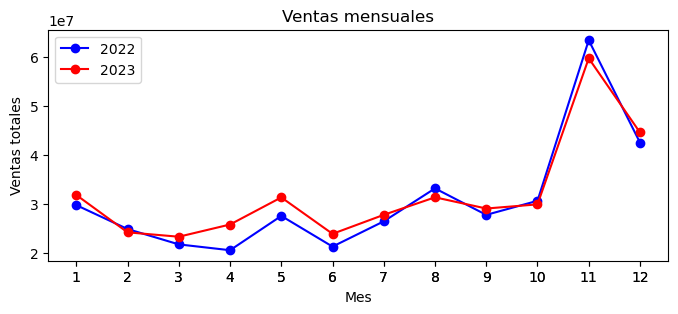

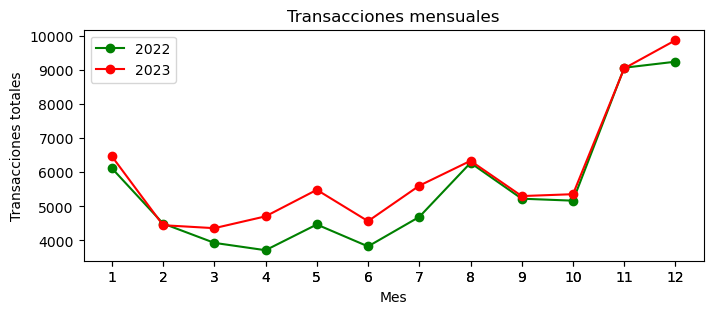

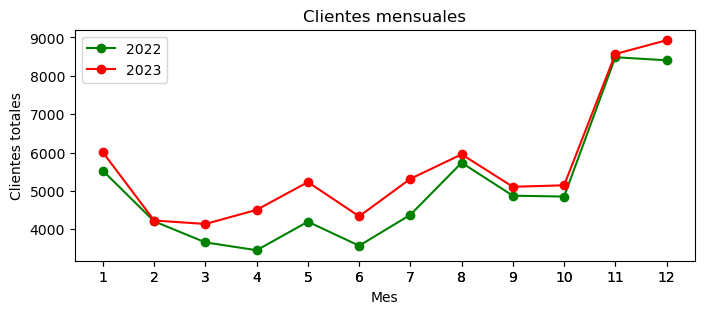

In [22]:
plt.figure(figsize=(8, 3))
plt.plot(sales_trends[sales_trends['YEAR']==2022]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2022]['SALES']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2023]['SALES']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Ventas mensuales')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['#TRX']
         ,marker='o', linestyle='-', color='green', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['#TRX']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.xlabel('Mes')
plt.ylabel('Transacciones totales')
plt.title('Transacciones mensuales')
plt.xticks(trx_clients['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['# CLIENTS']
         ,marker='o', linestyle='-', color='green', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['# CLIENTS']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.xlabel('Mes')
plt.ylabel('Clientes totales')
plt.title('Clientes mensuales')
plt.xticks(trx_clients['MONTH'])
plt.legend()
plt.show()

Lo primero que se puede notar es que los clientes, las trasacciones y las ventas aumentan en la última parte del año, de octubre a noviembre hay un saldo enorme, superando cualquier otra salto de mes a mes. También en 2023 hay más clientes, más trasacciones que en 2022 y en un alguno meses del 2022 se supera a ventas del 2023.

Y siempre hay un disminución al inicio del año lo que refleja una menor participación o actividad de compra por parte de los consumidores durante este período, leve recuperación a mediados del año y finalmente tener un despunte para el final del año

En agosto hay un alza, debe ser por el inicio del ciclo escolar

# Desarrolla una predicción para conocer la pérdida de clientes por todas las variables presentadas

No entendí la indicación

# Genera una pequeña predicción y mide el margen de error.

## Pronosticando 2024

### Ventas

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Creamos el modelo
model = ExponentialSmoothing(sales_trends['SALES'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Pronosticamos para 12 menes
forecast = fit_model.forecast(steps=12)

forecast_std_error = np.std(forecast)

# Generamos los intervalos de confianza
upper_bound = np.array(forecast + 1.96 * forecast_std_error, dtype=float)
lower_bound = np.array(forecast - 1.96 * forecast_std_error, dtype=float)

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


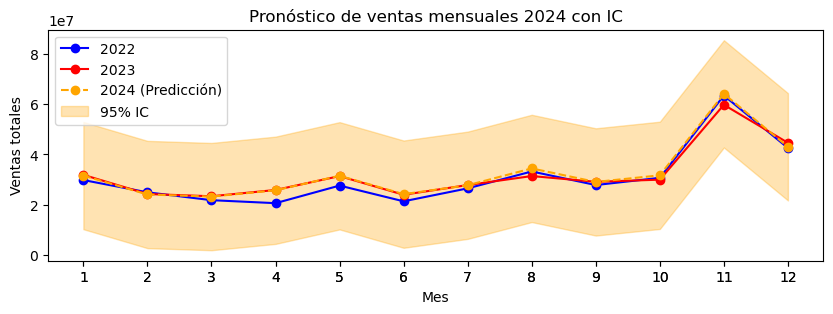

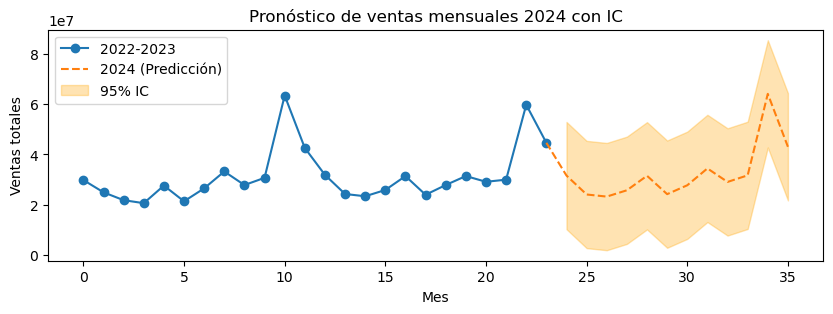

In [25]:
plt.figure(figsize=(10, 3))
plt.plot(sales_trends[sales_trends['YEAR']==2022]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2022]['SALES']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2023]['SALES']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH']
         ,forecast,marker='o', linestyle='--', color='orange', label='2024 (Predicción)')
plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH'],
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Pronóstico de ventas mensuales 2024 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

# Plot the results with a connected line between the historical and forecasted data
plt.figure(figsize=(10, 3))
plt.plot(sales_trends['SALES'],marker='o',label='2022-2023')
plt.plot(pd.concat([sales_trends['SALES'][-1:], forecast]), linestyle='--', label='2024 (Predicción)')
plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH']+23,
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de ventas mensuales 2024 con IC')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.legend()
#plt.grid(True)
plt.show()

### Clientes

In [26]:
# Creamos el modelo
model = ExponentialSmoothing(trx_clients['# CLIENTS'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Pronosticamos para 12 menes
forecast = fit_model.forecast(steps=12)

forecast_std_error = np.std(forecast)

# Generamos los intervalos de confianza
upper_bound = np.array(forecast + 1.96 * forecast_std_error, dtype=float)
lower_bound = np.array(forecast - 1.96 * forecast_std_error, dtype=float)

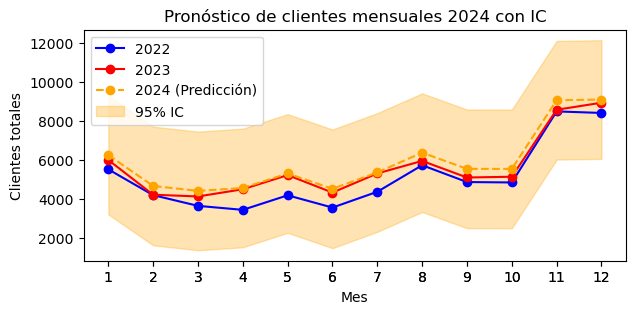

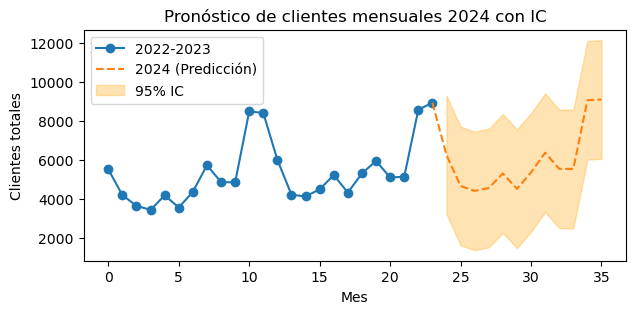

In [27]:
plt.figure(figsize=(7, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['# CLIENTS']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['# CLIENTS']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,forecast,marker='o', linestyle='--', color='orange', label='2024 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH'],
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Clientes totales')
plt.title('Pronóstico de clientes mensuales 2024 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

# Plot the results with a connected line between the historical and forecasted data
plt.figure(figsize=(7, 3))
plt.plot(trx_clients['# CLIENTS'],marker='o',label='2022-2023')
plt.plot(pd.concat([trx_clients['# CLIENTS'][-1:], forecast]), linestyle='--', label='2024 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH']+23,
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Clientes totales')
plt.title('Pronóstico de clientes mensuales 2024 con IC')
plt.legend()
#plt.grid(True)
plt.show()

### Transacciones

In [28]:
# Creamos el modelo
model = ExponentialSmoothing(trx_clients['#TRX'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Pronosticamos para 12 meses
forecast = fit_model.forecast(steps=12)

forecast_std_error = np.std(forecast)

# Generamos los intervalos de confianza
upper_bound = np.array(forecast + 1.96 * forecast_std_error, dtype=float)
lower_bound = np.array(forecast - 1.96 * forecast_std_error, dtype=float)

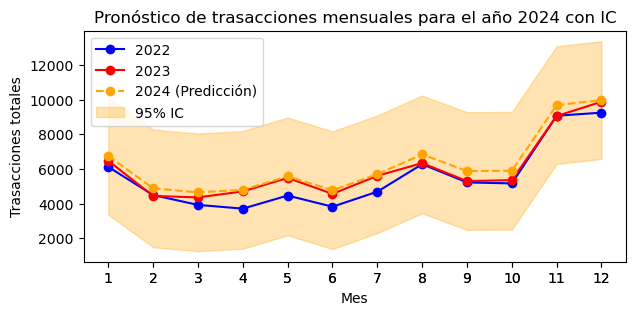

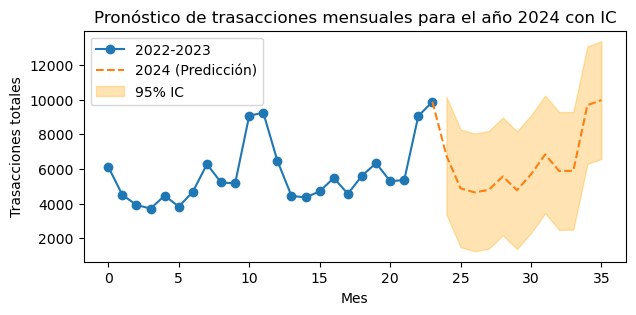

In [30]:
plt.figure(figsize=(7, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['#TRX']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['#TRX']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,forecast,marker='o', linestyle='--', color='orange', label='2024 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH'],
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Trasacciones totales')
plt.title('Pronóstico de trasacciones mensuales para el año 2024 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(trx_clients['#TRX'],marker='o',label='2022-2023')
plt.plot(pd.concat([trx_clients['#TRX'][-1:], forecast]), linestyle='--', label='2024 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH']+23,
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Trasacciones totales')
plt.title('Pronóstico de trasacciones mensuales para el año 2024 con IC')
plt.legend()
plt.show()

Podemos ver que el pronóstico para el 2024 parece ser muy fiable porque para cumplir con la tendencia con 2022 y 2023 para las transacciones, ventas y clientes

## Pronosticando 2023

### Ventas

In [73]:
# Creamos el modelo
model = ExponentialSmoothing(sales_trends['SALES'][:20], trend='add')
fit_model = model.fit()

# Pronosticamos para 12 meses
forecast = fit_model.forecast(steps=4)

# Generamos los intervalos de confianza
actual_values = sales_trends[sales_trends['YEAR'] == 2023]['SALES'][-4:].values
forecast_errors = actual_values - forecast
forecast_std_error = np.std(forecast_errors)
upper_bound = np.array(forecast + 1.96 * forecast_std_error, dtype=float)
lower_bound = np.array(forecast - 1.96 * forecast_std_error, dtype=float)

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


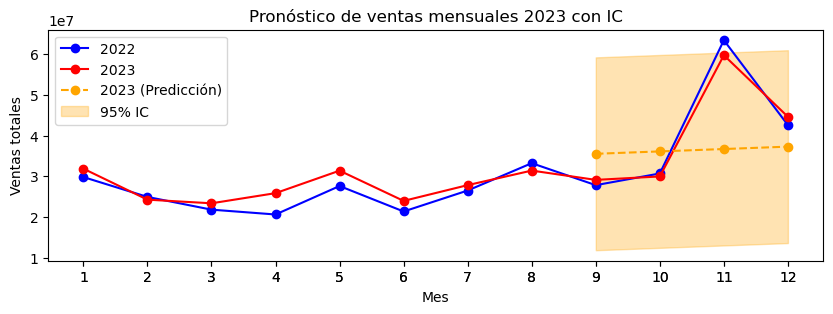

ValueError: operands could not be broadcast together with shapes (12,) (4,) 

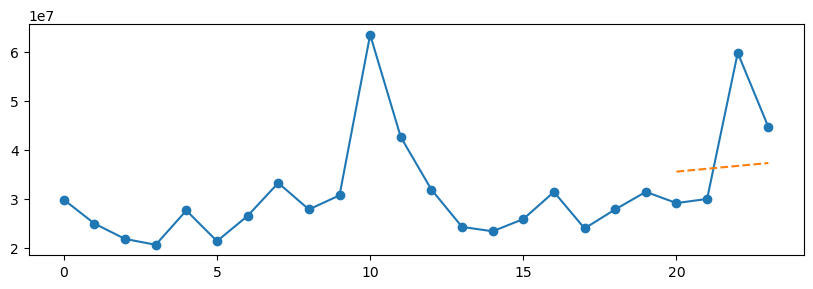

In [75]:
plt.figure(figsize=(10, 3))
plt.plot(sales_trends[sales_trends['YEAR']==2022]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2022]['SALES']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2023]['SALES']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH'][-4:]
         ,forecast,marker='o', linestyle='--', color='orange', label='2023 (Predicción)')
plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH'][-4:],
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Pronóstico de ventas mensuales 2023 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(sales_trends['SALES'],marker='o',label='2022-2023')
plt.plot(forecast, linestyle='--', label='2024 (Predicción)')
plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH']+11,
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de ventas mensuales 2023 con IC')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.legend()
plt.show()

In [20]:
# Creamos el modelo
model = ExponentialSmoothing(trx_clients['#TRX'][:20],  trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Pronosticamos para 12 meses
forecast = fit_model.forecast(steps=12)

# Generamos los intervalos de confianza
actual_values = trx_clients[trx_clients['YEAR'][-4:] == 2023]['#TRX'].values
forecast_errors = actual_values - forecast
forecast_std_error = np.std(forecast_errors)
upper_bound = np.array(forecast + 1.96 * forecast_std_error, dtype=float)
lower_bound = np.array(forecast - 1.96 * forecast_std_error, dtype=float)

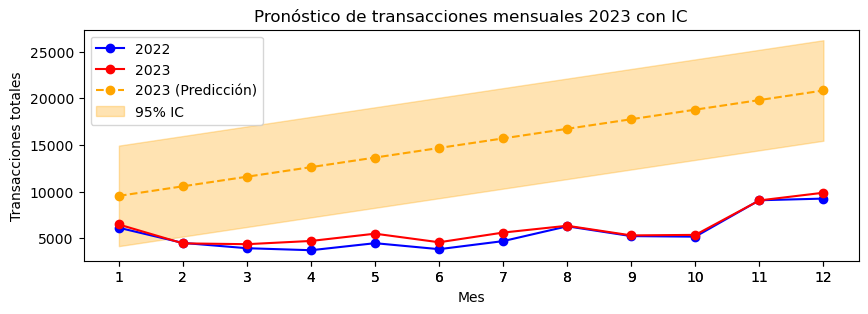

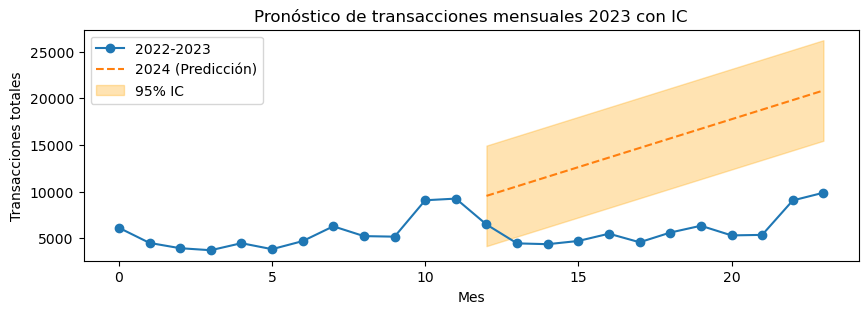

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['#TRX']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['#TRX']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,forecast,marker='o', linestyle='--', color='orange', label='2023 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH'],
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Transacciones totales')
plt.title('Pronóstico de transacciones mensuales 2023 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(trx_clients['#TRX'],marker='o',label='2022-2023')
plt.plot(forecast, linestyle='--', label='2024 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH']+11,
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de transacciones mensuales 2023 con IC')
plt.xlabel('Mes')
plt.ylabel('Transacciones totales')
plt.legend()
plt.show()

In [22]:
# Creamos el modelo
model = ExponentialSmoothing(trx_clients['# CLIENTS'][:20],  trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Pronosticamos para 12 meses
forecast = fit_model.forecast(steps=12)

# Generamos los intervalos de confianza
actual_values = trx_clients[trx_clients['YEAR'][-4:] == 2023]['#TRX'].values
forecast_errors = actual_values - forecast
forecast_std_error = np.std(forecast_errors)
upper_bound = np.array(forecast + 1.96 * forecast_std_error, dtype=float)
lower_bound = np.array(forecast - 1.96 * forecast_std_error, dtype=float)

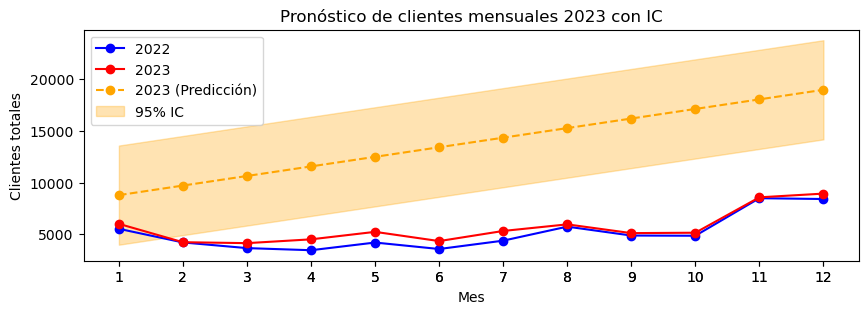

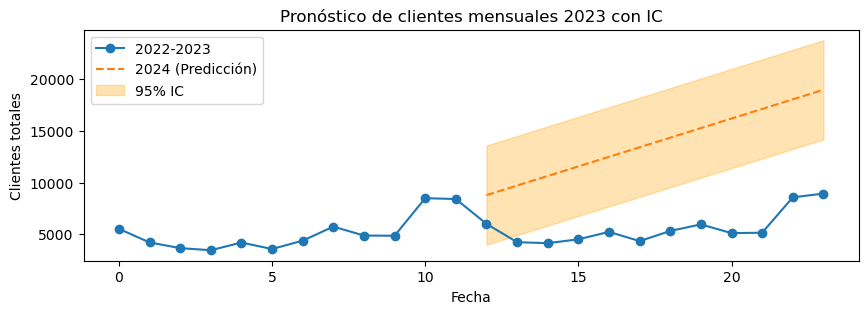

In [23]:
plt.figure(figsize=(10, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['# CLIENTS']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['# CLIENTS']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,forecast,marker='o', linestyle='--', color='orange', label='2023 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH'],
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Clientes totales')
plt.title('Pronóstico de clientes mensuales 2023 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(trx_clients['# CLIENTS'],marker='o',label='2022-2023')
plt.plot(forecast, linestyle='--', label='2024 (Predicción)')
plt.fill_between(trx_clients[trx_clients['YEAR']==2023]['MONTH']+11,
                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de clientes mensuales 2023 con IC')
plt.xlabel('Fecha')
plt.ylabel('Clientes totales')
plt.legend()
plt.show()

Podemos ver que el pronóstico para el 2023 no luce bien, creo que es por la falta de datos

In [42]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


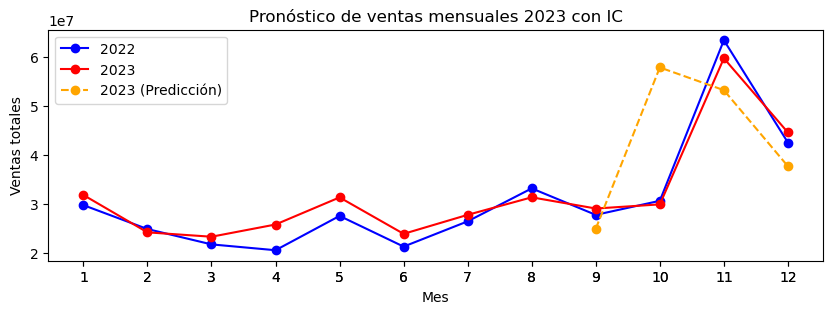

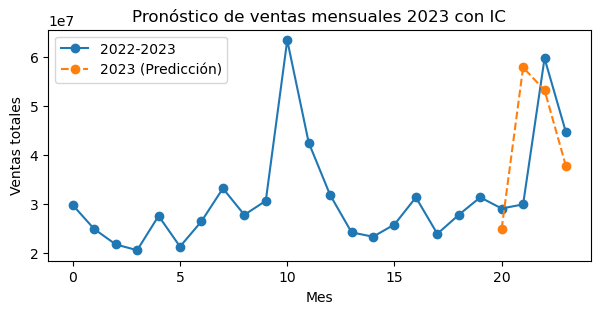

In [107]:
model_arima = ARIMA(sales_trends['SALES'][:20], order=(11, 1, 0))  # ARIMA order (p,d,q) is chosen based on the data structure
model_arima_fit = model_arima.fit()

# Forecast the next 4 months (September to December 2023) using ARIMA
forecast_arima = model_arima_fit.forecast(steps=4)

plt.figure(figsize=(10, 3))
plt.plot(sales_trends[sales_trends['YEAR']==2022]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2022]['SALES']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH']
         ,sales_trends[sales_trends['YEAR']==2023]['SALES']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(sales_trends[sales_trends['YEAR']==2023]['MONTH'][-4:]
         ,forecast_arima,marker='o', linestyle='--', color='orange', label='2023 (Predicción)')
#plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH'][-4:],
#                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Pronóstico de ventas mensuales 2023 con IC')
plt.xticks(sales_trends['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(sales_trends['SALES'],marker='o',label='2022-2023')
plt.plot(forecast_arima, linestyle='--', label='2023 (Predicción)',marker='o')
#plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH']+11,
#                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de ventas mensuales 2023 con IC')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.legend()
plt.show()

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


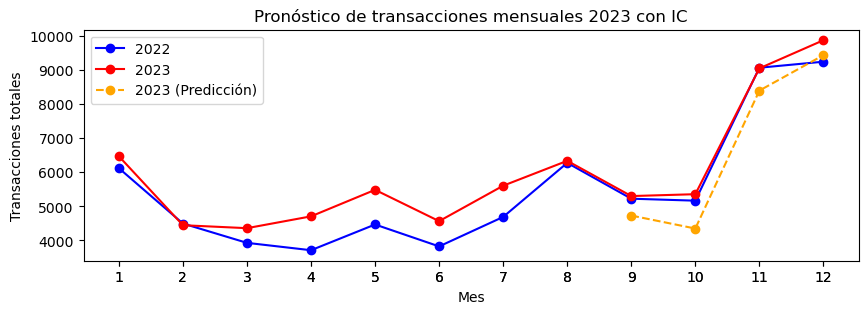

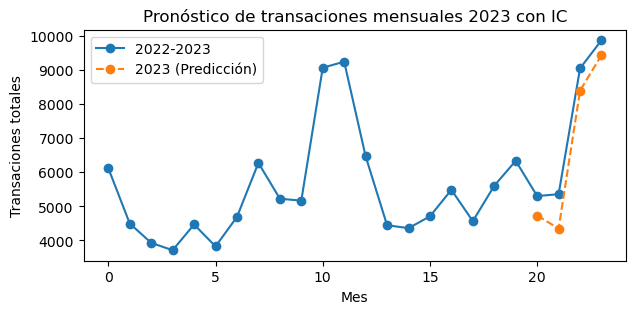

In [108]:
model_arima = ARIMA(trx_clients['#TRX'][:20], order=(11, 1, 3))  # ARIMA order (p,d,q) is chosen based on the data structure
model_arima_fit = model_arima.fit()

# Forecast the next 4 months (September to December 2023) using ARIMA
forecast_arima = model_arima_fit.forecast(steps=4)

plt.figure(figsize=(10, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['#TRX']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['#TRX']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH'][-4:]
         ,forecast_arima,marker='o', linestyle='--', color='orange', label='2023 (Predicción)')
#plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH'][-4:],
#                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Transacciones totales')
plt.title('Pronóstico de transacciones mensuales 2023 con IC')
plt.xticks(trx_clients['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(trx_clients['#TRX'],marker='o',label='2022-2023')
plt.plot(forecast_arima, linestyle='--', label='2023 (Predicción)',marker='o')
#plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH']+11,
#                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de transaciones mensuales 2023 con IC')
plt.xlabel('Mes')
plt.ylabel('Transaciones totales')
plt.legend()
plt.show()

In [128]:
trx_clients['# CLIENTS'][-5:-4]

19    5954
Name: # CLIENTS, dtype: int64

In [120]:
forecast_arima

20    4556.859949
21    5351.274615
22    8700.799738
23    8172.483752
Name: predicted_mean, dtype: float64

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


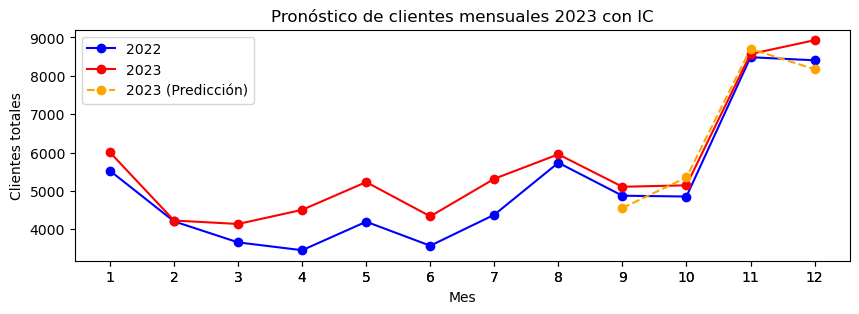

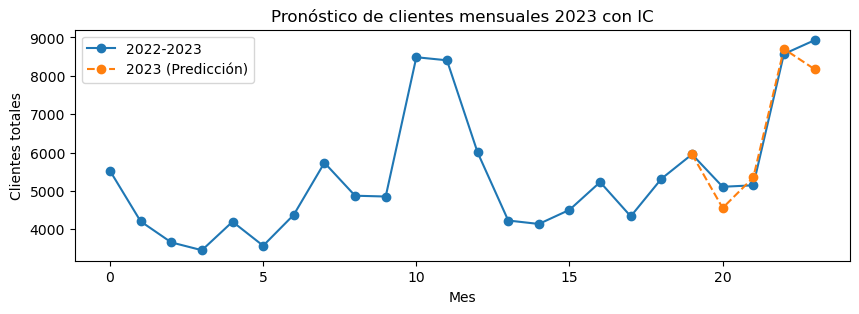

In [129]:
model_arima = ARIMA(trx_clients['# CLIENTS'][:20], order=(11, 0, 2))  # ARIMA order (p,d,q) is chosen based on the data structure
model_arima_fit = model_arima.fit()

# Forecast the next 4 months (September to December 2023) using ARIMA
forecast_arima = model_arima_fit.forecast(steps=4)

plt.figure(figsize=(10, 3))
plt.plot(trx_clients[trx_clients['YEAR']==2022]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2022]['# CLIENTS']
         ,marker='o', linestyle='-', color='blue', label='2022')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH']
         ,trx_clients[trx_clients['YEAR']==2023]['# CLIENTS']
         ,marker='o', linestyle='-', color='red', label='2023')
plt.plot(trx_clients[trx_clients['YEAR']==2023]['MONTH'][-4:]
         ,forecast_arima,marker='o', linestyle='--', color='orange', label='2023 (Predicción)')
#plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH'][-4:],
#                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.xlabel('Mes')
plt.ylabel('Clientes totales')
plt.title('Pronóstico de clientes mensuales 2023 con IC')
plt.xticks(trx_clients['MONTH'])
plt.legend()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(trx_clients['# CLIENTS'],marker='o',label='2022-2023')
plt.plot(pd.concat([trx_clients['# CLIENTS'][-5:-4], forecast_arima]), linestyle='--', label='2023 (Predicción)',marker='o')
#plt.fill_between(sales_trends[sales_trends['YEAR']==2023]['MONTH']+11,
#                 lower_bound, upper_bound, color='orange', alpha=0.3, label='95% IC')
plt.title('Pronóstico de clientes mensuales 2023 con IC')
plt.xlabel('Mes')
plt.ylabel('Clientes totales')
plt.legend()
plt.show()